<a href="https://colab.research.google.com/github/karisobomac/Heart-Disease-Classification-Using-Artificial-Neural-Network-and-XGboost-Algorithm/blob/main/Copy_of_decision_tree_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Classification using Artificial Neural Network and XGBoost Algorithm

**TASK 1. UNDERSTANDING THE PROBLEM STATEMENT**

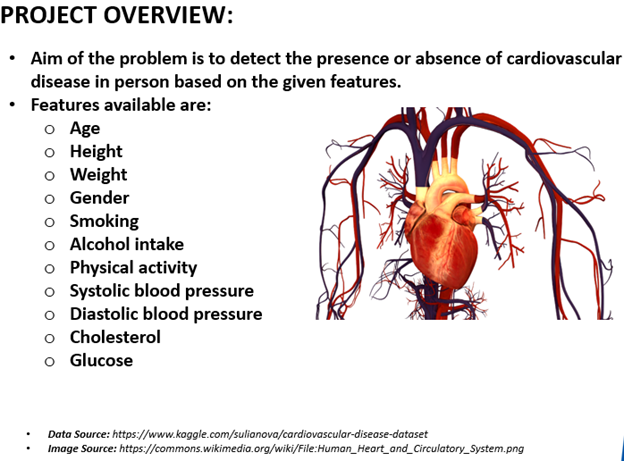



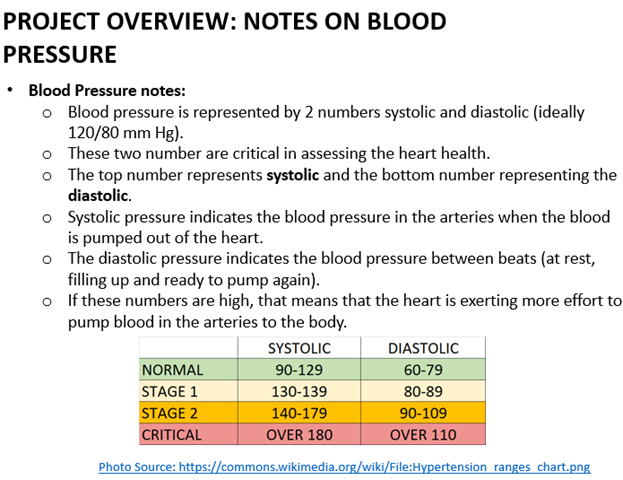

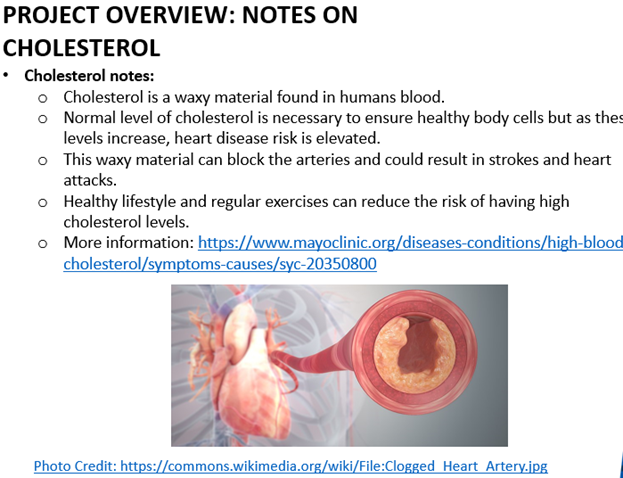

**TASK 2. PERFORMING EXPLORATORY DATA ANALYSIS**

## Importing the libraries

In [1]:
# Importing the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import tensorflow as tf

## Importing the dataset

In [2]:
cardio_df = pd.read_csv('Cardio_train.csv')

In [3]:
cardio_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
# drop id column 

cardio_df = cardio_df.drop('id', axis = 1)

In [5]:
cardio_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
# age data comes in form of days, but will be converted into years

cardio_df['age'] = cardio_df['age']/365


In [7]:
cardio_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [8]:
# Checking for Missing Data / null values

cardio_df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [9]:
# Cheching the data frame info

cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  float64
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 6.4 MB


In [10]:
# Statistical summary of the data frame

cardio_df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f55fd814a58>,
      dtype=object)

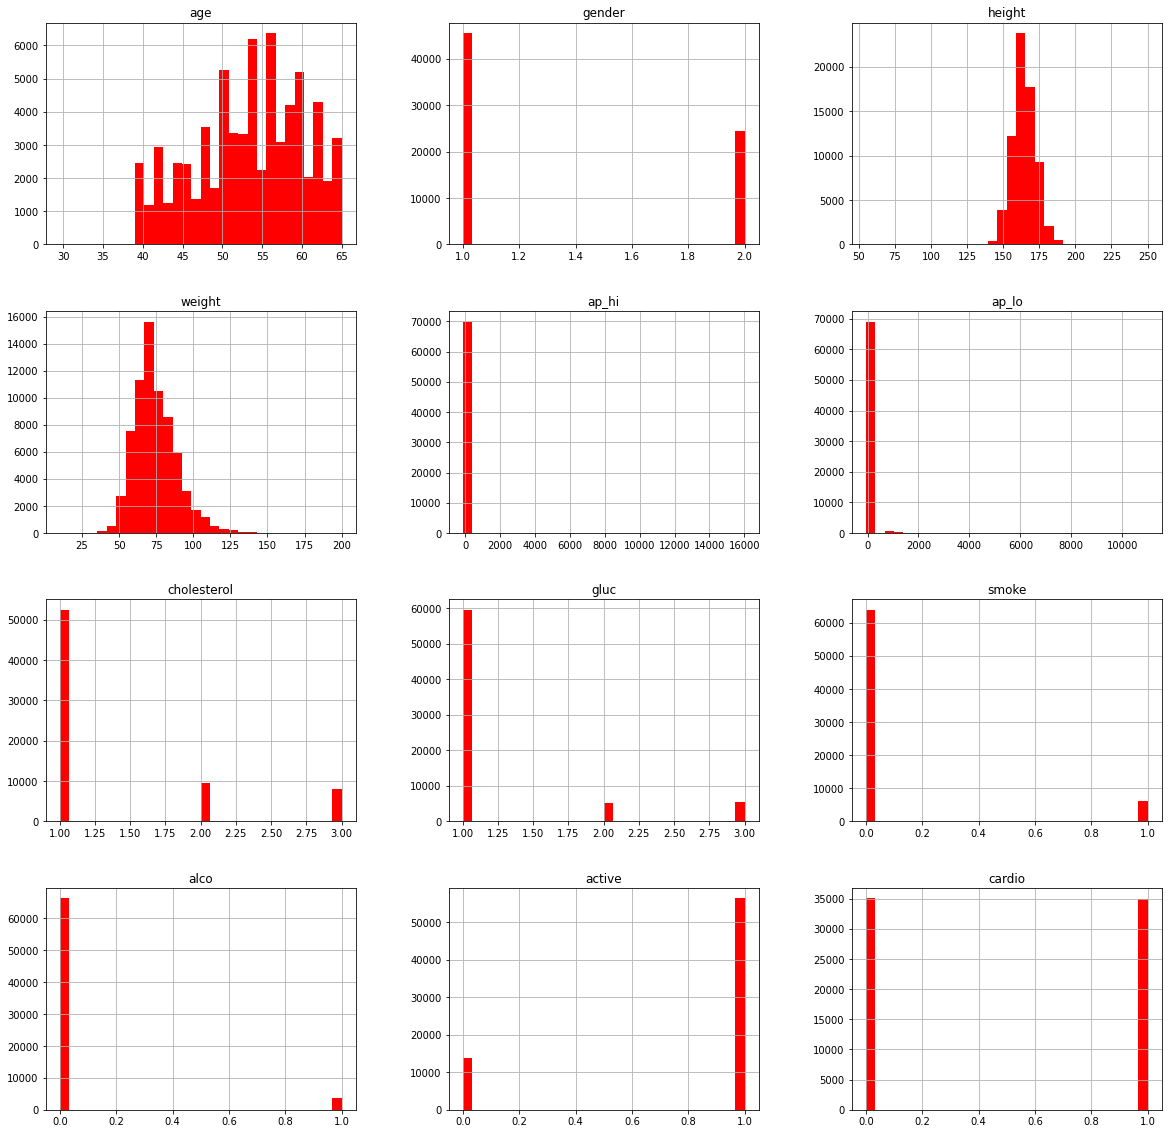

In [11]:
cardio_df.hist(bins= 30, figsize = (20,20), color = 'r')

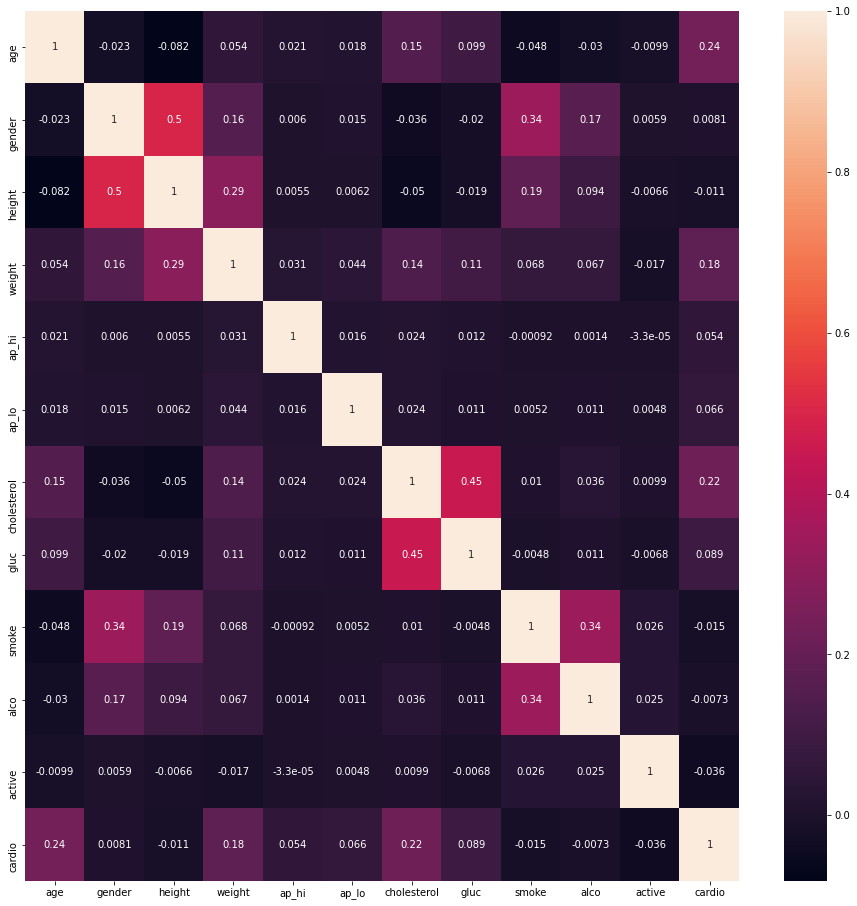

In [12]:
# visualizing the correlation matrix

corr_matrix = cardio_df.corr()
corr_matrix

plt.figure(figsize = (16,16))
sns.heatmap(corr_matrix, annot = True)
plt.show()

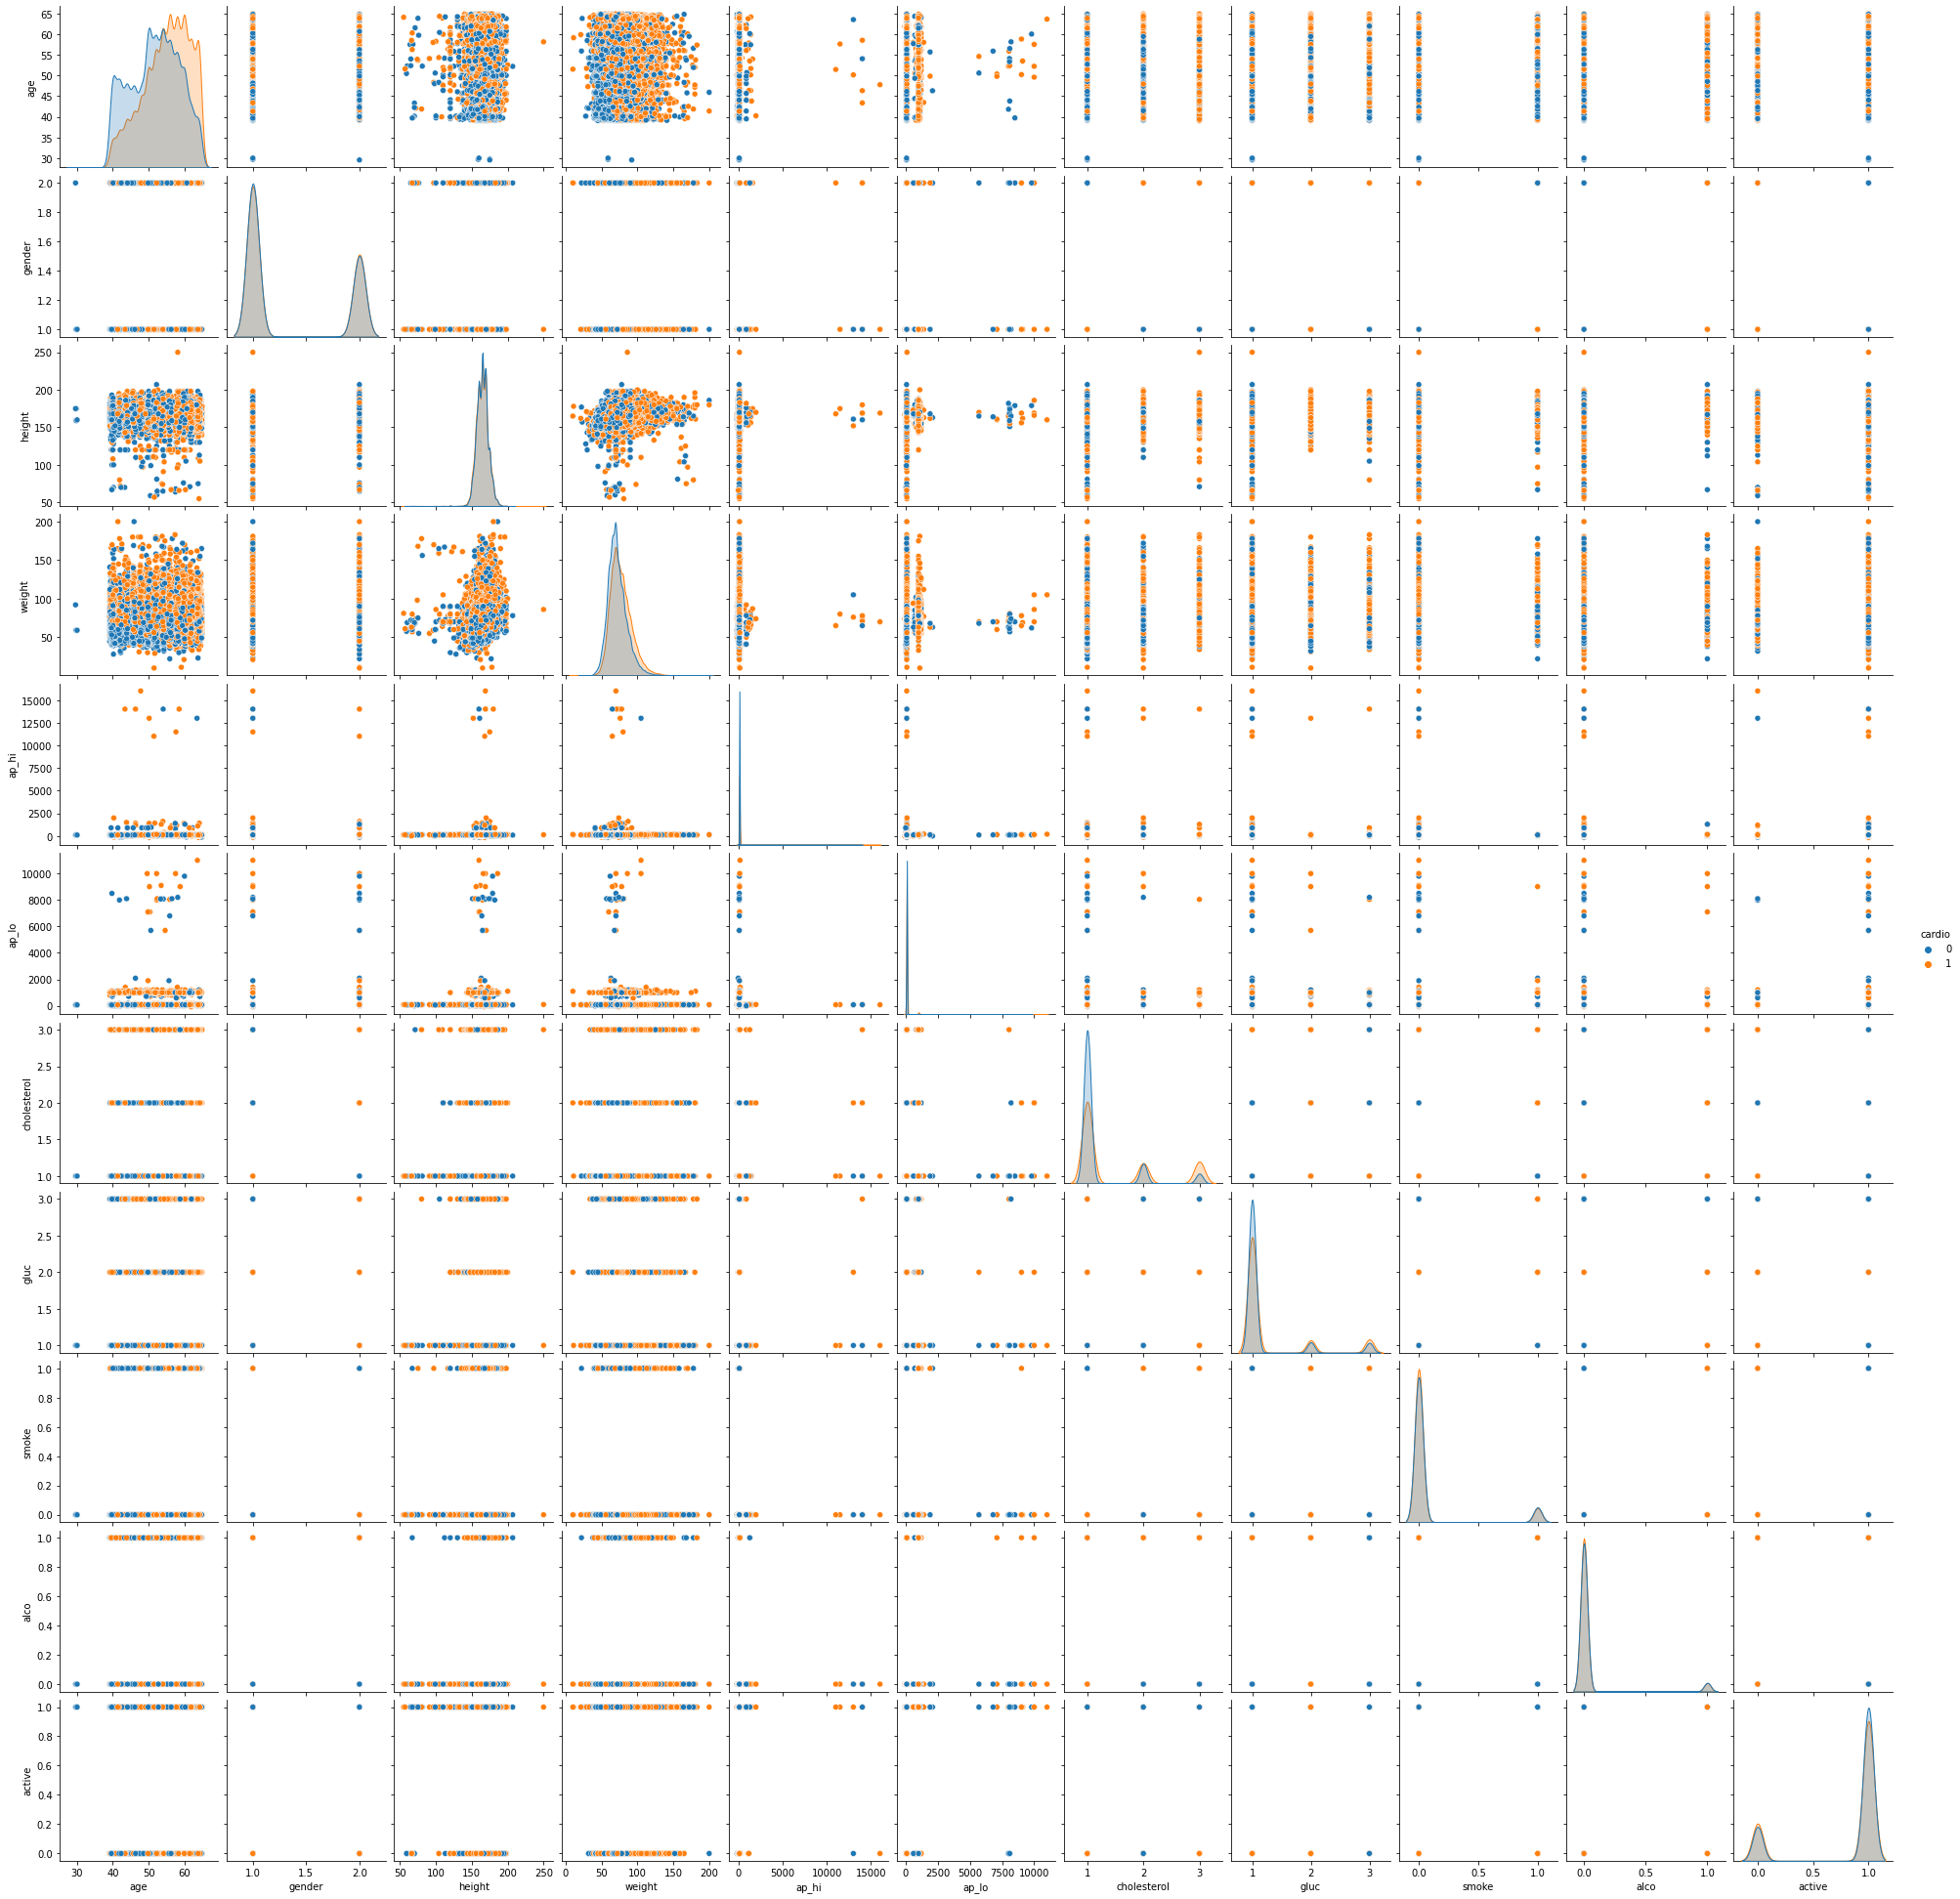

In [13]:
sns.pairplot(cardio_df, hue = 'cardio')

**TASK 3. BUILD AND TRAIN AN ARTIFICIAL NEURAL NETWORK MODEL**

In [14]:
# split the dataframe into target and features

y = cardio_df['cardio']
X = cardio_df.drop(columns = ['cardio'])

In [15]:
print(X)

             age  gender  height  weight  ...  gluc  smoke  alco  active
0      50.391781       2     168    62.0  ...     1      0     0       1
1      55.419178       1     156    85.0  ...     1      0     0       1
2      51.663014       1     165    64.0  ...     1      0     0       0
3      48.282192       2     169    82.0  ...     1      0     0       1
4      47.873973       1     156    56.0  ...     1      0     0       0
...          ...     ...     ...     ...  ...   ...    ...   ...     ...
69995  52.712329       2     168    76.0  ...     1      1     0       1
69996  61.920548       1     158   126.0  ...     2      0     0       1
69997  52.235616       2     183   105.0  ...     1      0     1       0
69998  61.454795       1     163    72.0  ...     2      0     0       0
69999  56.273973       1     170    72.0  ...     1      0     0       1

[70000 rows x 11 columns]


In [16]:
print(y)

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64


## Feature Scaling

In [17]:
# Feature Scale the features

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [18]:
print(X)

[[-0.43606151  1.36405487  0.44345206 ... -0.31087913 -0.23838436
   0.49416711]
 [ 0.30768633 -0.73310834 -1.01816804 ... -0.31087913 -0.23838436
   0.49416711]
 [-0.24799666 -0.73310834  0.07804703 ... -0.31087913 -0.23838436
  -2.02360695]
 ...
 [-0.16328642  1.36405487  2.27047718 ... -0.31087913  4.19490608
  -2.02360695]
 [ 1.20058905 -0.73310834 -0.16555632 ... -0.31087913 -0.23838436
  -2.02360695]
 [ 0.43414373 -0.73310834  0.68705541 ... -0.31087913 -0.23838436
   0.49416711]]


## Spliting the data into Training set and test set

In [19]:
# Split the date int train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [20]:
X_train

array([[-1.3042402 , -0.73310834,  0.68705541, ..., -0.31087913,
        -0.23838436,  0.49416711],
       [ 0.45724652, -0.73310834,  0.44345206, ..., -0.31087913,
        -0.23838436,  0.49416711],
       [-0.22529918, -0.73310834, -1.50537474, ..., -0.31087913,
        -0.23838436,  0.49416711],
       ...,
       [ 0.41468874, -0.73310834, -0.89636637, ..., -0.31087913,
        -0.23838436,  0.49416711],
       [-1.00187731, -0.73310834,  0.32165038, ..., -0.31087913,
        -0.23838436, -2.02360695],
       [ 0.58208267, -0.73310834, -0.04375464, ..., -0.31087913,
        -0.23838436,  0.49416711]])

In [21]:
y_train

19067    0
40240    1
20818    0
50351    0
10666    0
        ..
21640    1
24282    0
22093    1
45617    0
23386    0
Name: cardio, Length: 56000, dtype: int64

In [22]:
X_test

array([[ 0.38023721,  1.36405487,  0.44345206, ..., -0.31087913,
        -0.23838436,  0.49416711],
       [-1.6905027 , -0.73310834, -0.16555632, ..., -0.31087913,
         4.19490608,  0.49416711],
       [ 0.14961458,  1.36405487,  1.17426211, ..., -0.31087913,
        -0.23838436, -2.02360695],
       ...,
       [ 1.63224652, -0.73310834, -0.77456469, ..., -0.31087913,
        -0.23838436, -2.02360695],
       [ 1.59455249,  1.36405487,  0.68705541, ..., -0.31087913,
        -0.23838436,  0.49416711],
       [ 1.05265011,  1.36405487,  0.80885708, ..., -0.31087913,
         4.19490608,  0.49416711]])

In [23]:
y_test

9941     1
39866    0
42677    0
58057    0
4017     0
        ..
58987    1
19210    0
1701     1
18807    1
55258    0
Name: cardio, Length: 14000, dtype: int64

## Built an Artificial Neural Network Model

In [24]:
# Building  an ANN Model

classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(11, )))
classifier.add(tf.keras.layers.Dropout(0.2))

classifier.add(tf.keras.layers.Dense(units=400, activation='relu'))
classifier.add(tf.keras.layers.Dense(units=400, activation='relu'))

classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [25]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1200      
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               40400     
_________________________________________________________________
dense_2 (Dense)              (None, 400)               160400    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 401       
Total params: 202,401
Trainable params: 202,401
Non-trainable params: 0
_________________________________________________________________


In [26]:
classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics= ['accuracy'])

In [27]:
# Optimizing the Classifier with 50 Epoch steps

epochs_hist = classifier.fit(X_train, y_train, epochs= 50)

Epoch 1/50
1750/1750 [==============================] - 5s 3ms/step - loss: 0.5891 - accuracy: 0.6977
Epoch 2/50
1750/1750 [==============================] - 5s 3ms/step - loss: 0.5570 - accuracy: 0.7259
Epoch 3/50
1750/1750 [==============================] - 5s 3ms/step - loss: 0.5512 - accuracy: 0.7305
Epoch 4/50
1750/1750 [==============================] - 5s 3ms/step - loss: 0.5485 - accuracy: 0.7308
Epoch 5/50
1750/1750 [==============================] - 5s 3ms/step - loss: 0.5473 - accuracy: 0.7314
Epoch 6/50
1750/1750 [==============================] - 5s 3ms/step - loss: 0.5460 - accuracy: 0.7307
Epoch 7/50
1750/1750 [==============================] - 5s 3ms/step - loss: 0.5457 - accuracy: 0.7326
Epoch 8/50
1750/1750 [==============================] - 5s 3ms/step - loss: 0.5447 - accuracy: 0.7352
Epoch 9/50
1750/1750 [==============================] - 5s 3ms/step - loss: 0.5443 - accuracy: 0.7336
Epoch 10/50
1750/1750 [==============================] - 6s 3ms/step - loss: 0.544

In [28]:
# Making a prediction of the test set

y_pred = classifier.predict(X_test)

In [29]:
y_pred

array([[0.90146625],
       [0.12247622],
       [0.5607696 ],
       ...,
       [0.6538431 ],
       [0.5395747 ],
       [0.3328998 ]], dtype=float32)

In [30]:
y_pred = (y_pred > 0.5)

In [31]:
y_pred

array([[ True],
       [False],
       [ True],
       ...,
       [ True],
       [ True],
       [False]])

 TASK 4  EVALUATE THE ARTIFICIAL NEUTRAL NETWORK MODEL

In [32]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

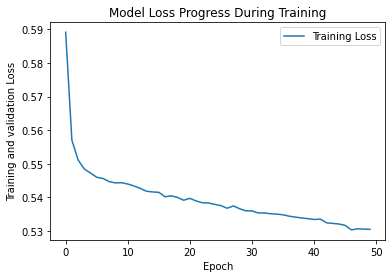

In [33]:
# Plotting a graph of Model loss progress during traning

plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and validation Loss')
plt.legend(['Training Loss'])

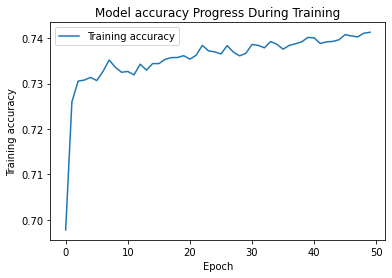

In [34]:
# Plotting a graph of Model accuracy progress during training

plt.plot(epochs_hist.history['accuracy'])
plt.title('Model accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training accuracy')
plt.legend(['Training accuracy'])

## TESTING SET PERFORMANCE

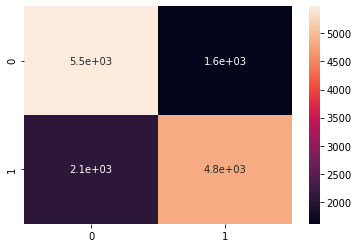

In [46]:
# Testing set Performance

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [54]:
from sklearn.metrics import classification_report
print(classification_report (y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75      7091
           1       0.75      0.70      0.72      6909

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



In [47]:
# Checking the accuracy score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)*100

[[5480 1611]
 [2077 4832]]


73.65714285714286

## TASK 5. BUILD AND TRAIN USING XGBOOST CLASSIFIER MODEL

In [49]:
# XGBClassifier is an ensemble algoriths and works by selecting thresholds or cut points on features to split a node.
# feature scaling is not neccessary with XGBoost

# model = XGBClassifier(learning_rate=0.01 n_estimators=100, objective='binary:logistic')

from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [50]:
# Make prediction on test data

predict = model.predict(X_test)

In [51]:
predict

array([1, 0, 1, ..., 1, 1, 0])

In [52]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75      7091
           1       0.75      0.71      0.73      6909

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



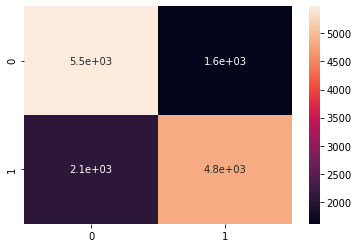

In [53]:
# Ploting the confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)